[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/luleu96/GenAIinDD_Exercises/blob/work/Exercises/Exercise_3/Importance_Sampling.ipynb)

Source: [A simple tutorial on Sampling Importance and Monte Carlo with Python codes](https://medium.com/@amir_masoud/a-simple-tutorial-on-sampling-importance-and-monte-carlo-with-python-codes-8ce809b91465)

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
def f_x(x):
    return 1/(1 + np.exp(-x))

def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

In [10]:
n = 1000
mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1
p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

<ipython-input-12-abc5d3b45b11>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
<ipython-input-12-abc5d3b45b11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_appro, sigma_appro

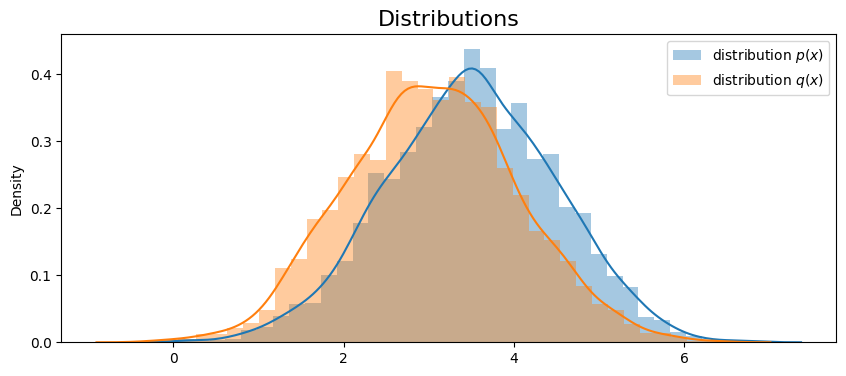

In [12]:
plt.figure(figsize=[10, 4])
sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")
plt.title("Distributions", size=16)
plt.legend()

In [13]:
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)
print("simulate value", s / n)

simulate value 0.9558558701986976


In [14]:
# calculate value sampling from a different distribution
value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i) * (p_x.pdf(x_i) / q_x.pdf(x_i))
    value_list.append(value)
print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

average 0.9663383822344844 variance 0.32810458854756525


In [15]:
# pre-setting different q(x)
n = 5000
mu_target = 3.5
sigma_target = 1
mu_appro = 1
sigma_appro = 1
p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

<ipython-input-16-a982e17a4d04>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
<ipython-input-16-a982e17a4d04>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_appro, sigma_appro

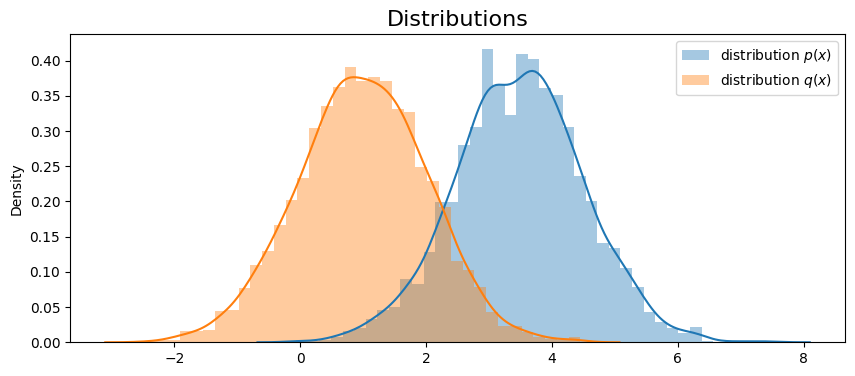

In [16]:
plt.figure(figsize=[10, 4])
sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")
plt.title("Distributions", size=16)
plt.legend()

In [19]:
# calculate value sampling from a different distribution    value_list = []
    # need larger steps
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i) * (p_x.pdf(x_i) / q_x.pdf(x_i))
    value_list.append(value)
    #print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))